#Abstract

The SEVIR Dataset is a Storm Event Imagery Dataset for Deep Learning Applications in Radar and Satellite Meteorology. With advances in computing technology it has become more easy than ever to work with deep learning and machine learning frameworks in data intensive domains such as meteorology, specifically in focus areas such as nowcasting, synthetic radar generation, front detection among others which deal with petabytes of data. The SEVIR is a single source rich dataset that contains spatially and temporally aligned data generated by multiple sensors.
It contains images of 384km x 384km stretches sampled over US soil and consists of 4 hours of data in 5 minute intervals.

The notebook here takes us through the following steps with respect to working with SEVIR data.

1. Downloading SEVIR files
2. Accessing SEVIR Data
3. Visualizing SEVIR Data
4. Georeferencing SEVIR Events

#Scope 

As for the scope of this notebook, we will be considering only one particular event, namely, 835047 - and visualize the above aspects, in that order for this one event of interest.

##Downloading SEVIR Data

SEVIR Data consists of 5 different reading types from 5 different sensors as shown below: 
 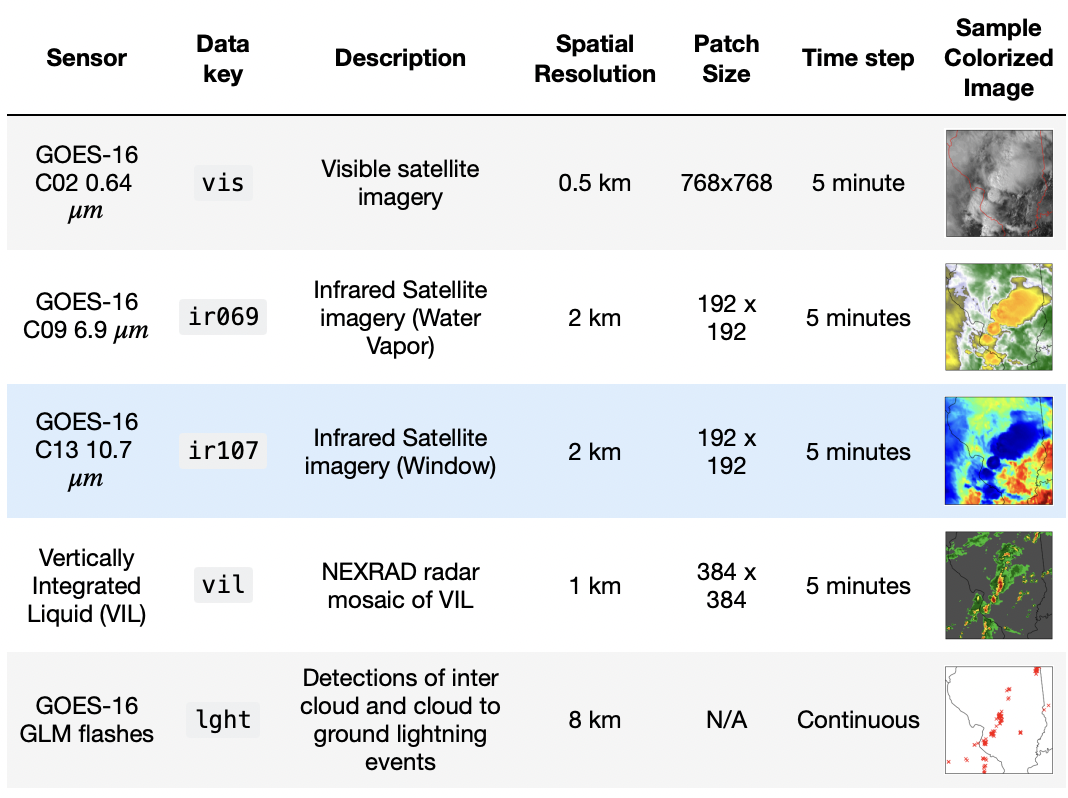

each of these sensor's data is organized into various filepaths, and various years. These amount to about 50GB in each type of these sensors and the whole dataset is about 1 TB in size.

The suggested method of access of this data is the AWS CLI, but with such large amounts of data, storage becomes an issue. The solution suggested at https://github.com/MIT-AI-Accelerator/sevir_challenges is to be using boto3 modules.

Using the python boto3 modules (conda install boto3) you can obtain SEVIR data by first connecting to the S3 bucket and then get a list of files as shown below.

In [1]:
pip install boto3

     |████████████████████████████████| 131 kB 5.6 MB/s 
     |████████████████████████████████| 8.5 MB 10.6 MB/s 
     |████████████████████████████████| 79 kB 5.7 MB/s 
     |████████████████████████████████| 138 kB 49.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import boto3
from botocore.handlers import disable_signing
resource = boto3.resource('s3')
resource.meta.client.meta.events.register('choose-signer.s3.*', disable_signing)
bucket=resource.Bucket('sevir')

In [3]:
objs=bucket.objects.filter(Prefix='')
print([o.key for o in objs])
for o in objs:
    if '2019_0101_0630' in o.key:
      print(o.key)
    if 'SEVIR_LGHT_ALLEVENTS_2019_0601_0701' in o.key:
      print(o.key)
    if 'SEVIR_VIS_STORMEVENTS_2019_0601_0630' in o.key:
      print(o.key)

['CATALOG.csv', 'data/', 'data/ir069/2018/SEVIR_IR069_RANDOMEVENTS_2018_0101_0430.h5', 'data/ir069/2018/SEVIR_IR069_RANDOMEVENTS_2018_0501_0831.h5', 'data/ir069/2018/SEVIR_IR069_RANDOMEVENTS_2018_0901_1231.h5', 'data/ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0101_0630.h5', 'data/ir069/2018/SEVIR_IR069_STORMEVENTS_2018_0701_1231.h5', 'data/ir069/2019/SEVIR_IR069_RANDOMEVENTS_2019_0101_0430.h5', 'data/ir069/2019/SEVIR_IR069_RANDOMEVENTS_2019_0501_0831.h5', 'data/ir069/2019/SEVIR_IR069_RANDOMEVENTS_2019_0901_1231.h5', 'data/ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0630.h5', 'data/ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0701_1231.h5', 'data/ir107/2018/SEVIR_IR107_RANDOMEVENTS_2018_0101_0430.h5', 'data/ir107/2018/SEVIR_IR107_RANDOMEVENTS_2018_0501_0831.h5', 'data/ir107/2018/SEVIR_IR107_RANDOMEVENTS_2018_0901_1231.h5', 'data/ir107/2018/SEVIR_IR107_STORMEVENTS_2018_0101_0630.h5', 'data/ir107/2018/SEVIR_IR107_STORMEVENTS_2018_0701_1231.h5', 'data/ir107/2019/SEVIR_IR107_RANDOMEVENTS_2019_0101

Now that we know the files we are intersted in, we can download just these 5 files to our storage location. Since we are working with Google Colab notebooks in our case, we will be using Google drive for storage.

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import os

path = "gdrive/MyDrive/home"
os.mkdir(path)
path = "gdrive/MyDrive/home/data"
os.mkdir(path)
path = "gdrive/MyDrive/home/data/SEVIR"
os.mkdir(path)
path = "gdrive/MyDrive/home/data/vil"
os.mkdir(path)
path = "gdrive/MyDrive/home/data/vil/2019"
os.mkdir(path)
path = "gdrive/MyDrive/home/data/ir069"
os.mkdir(path)
path = "gdrive/MyDrive/home/data/ir069/2019"
os.mkdir(path)
path = "gdrive/MyDrive/home/data/ir107"
os.mkdir(path)
path = "gdrive/MyDrive/home/data/ir107/2019"
os.mkdir(path)
path = "gdrive/MyDrive/home/data/vis"
os.mkdir(path)
path = "gdrive/MyDrive/home/data/vis/2019"
os.mkdir(path)
path = "gdrive/MyDrive/home/data/lght"
os.mkdir(path)
path = "gdrive/MyDrive/home/data/lght/2019"
os.mkdir(path)

In [6]:
bucket.download_file('CATALOG.csv','gdrive/MyDrive/home/data/SEVIR/CATALOG.csv')

In [7]:
bucket.download_file('data/vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5','gdrive/MyDrive/home/data/vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5')

In [8]:
bucket.download_file('data/ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0630.h5','gdrive/MyDrive/home/data/ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0630.h5')

In [9]:
bucket.download_file('data/ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0630.h5','gdrive/MyDrive/home/data/ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0630.h5')

In [10]:
bucket.download_file('data/vis/2019/SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5','gdrive/MyDrive/home/data/vis/2019/SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5')

In [11]:
bucket.download_file('data/lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0601_0701.h5','gdrive/MyDrive/home/data/lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0601_0701.h5')

In [12]:
# Enter path to the SEVIR data location
DATA_PATH    = 'gdrive/MyDrive/home/data'
CATALOG_PATH = 'gdrive/MyDrive/home/data/SEVIR/CATALOG.csv' 

# On some Linux systems setting file locking to false is also necessary:
import os
os.environ["HDF5_USE_FILE_LOCKING"]='FALSE' 

##Accessing a SEVIR event

The following code shows how to open a data file directly without using the catalog to visualize frames of an event captured by a single type using the `h5py` module. We are accessing our event 835047 from the `vil` sensor data and visualizing that.

Event ID: b'S835047'
Image shape: (384, 384, 49)


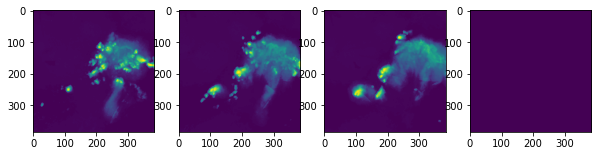

In [13]:
import os
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
 
file_index = 14
with h5py.File('%s/vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5' % DATA_PATH,'r') as hf:
    event_id = hf['id'][file_index]
    vil      = hf['vil'][file_index] 
    
print('Event ID:',event_id)
print('Image shape:',vil.shape)

fig,axs=plt.subplots(1,4,figsize=(10,5))
axs[0].imshow(vil[:,:,10])
axs[1].imshow(vil[:,:,20])
axs[2].imshow(vil[:,:,30])
axs[3].imshow(vil[:,:,40])
plt.show()

The catalog can be used to easily obtain event data captured by multiple sensor types.  The catalog can be grouped on the `id` column to locate all available sensors for each event.  Since that some events in SEVIR are not covered by all sensors, so it is also necessary to filter out events that aren't covered by all requested image types.

The code below shows how to extract an event observed by four image types: `vis`, `vil`, `ir069` and `ir107`. Again, since we are only interested in one of the long list of events available in the CATALOG.csv file, we will be filtering out to find the `vis`,`vil`,`ir069` and `ir107` images for that event.


In [14]:
pip install h5py

In [15]:
import h5py # needs conda/pip install h5py
import matplotlib.pyplot as plt
import pandas as pd  

# Read catalog
catalog = pd.read_csv(CATALOG_PATH,parse_dates=['time_utc'],low_memory=False)

# Desired image types
img_types = set(['ir069','ir107','vil','vis'])

# Group by event id, and filter to only events that have all desired img_types
events = catalog.groupby('id').filter(lambda x: img_types.issubset(set(x['img_type']))).groupby('id')
#events = events1.groupby('id').filter(lambda x: x['file_name'] in sevirfilenames).groupby('id')
event_ids = list(events.groups.keys())
print('Found %d events matching' % len(event_ids),img_types)

# Grab the event 835047 and view catalog entries

sample_event=events.get_group('S835047')
print('Sample Event:','S835047')
sample_event

Found 12739 events matching {'vis', 'ir107', 'vil', 'ir069'}
Sample Event: S835047


,id,file_name,file_index,img_type,time_utc,minute_offsets,episode_id,event_id,event_type,llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon,proj,size_x,size_y,height_m,width_m,data_min,data_max,pct_missing
19299,S835047,vil/2019/SEVIR_VIL_STORMEVENTS_2019_0101_0630.h5,14,vil,2019-06-26 21:32:00,-122:-117:-112:-107:-102:-97:-92:-87:-82:-77:-...,138836.0,835047.0,Hail,35.015742,-96.067844,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,384,384,384000.0,384000.0,0.000000,254.000000,0.290709
22412,S835047,ir107/2019/SEVIR_IR107_STORMEVENTS_2019_0101_0...,12,ir107,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,-96.067844,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-72.195297,30.619873,0.000000
29236,S835047,ir069/2019/SEVIR_IR069_STORMEVENTS_2019_0101_0...,12,ir069,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,-96.067844,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,192,192,384000.0,384000.0,-72.988350,-21.160448,0.000000
41182,S835047,vis/2019/SEVIR_VIS_STORMEVENTS_2019_0601_0630.h5,34,vis,2019-06-26 21:32:00,-124:-119:-114:-109:-104:-99:-94:-89:-84:-79:-...,138836.0,835047.0,Hail,35.015742,-96.067844,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,768,768,384000.0,384000.0,0.017251,1.159615,0.000000
72402,S835047,lght/2019/SEVIR_LGHT_ALLEVENTS_2019_0601_0701.h5,0,lght,2019-06-26 21:32:00,NaN,138836.0,835047.0,Hail,35.015742,-96.067844,38.311287,-91.574426,+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=63...,48,48,384000.0,384000.0,0.000000,328332.000000,0.000000


This data frame contains rows for each of the image types in SEVIR corresponding to the listed `id`=835047.  The following code uses rows of `sample_event` to extract image data for each type:

(<matplotlib.image.AxesImage at 0x7f9197878e50>, Text(0.5, 1.0, 'VIL'))

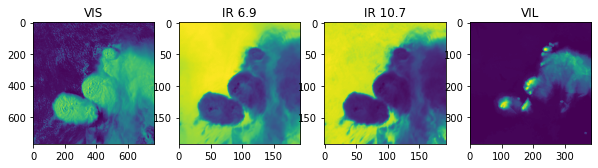

In [16]:
def read_data( sample_event, img_type, data_path=DATA_PATH ):
    """
    Reads single SEVIR event for a given image type.
    
    Parameters
    ----------
    sample_event   pd.DataFrame
        SEVIR catalog rows matching a single ID
    img_type   str
        SEVIR image type
    data_path  str
        Location of SEVIR data
    
    Returns
    -------
    np.array
       LxLx49 tensor containing event data
    """
    fn = sample_event[sample_event.img_type==img_type].squeeze().file_name
    fi = sample_event[sample_event.img_type==img_type].squeeze().file_index
    with h5py.File(data_path + '/' + fn,'r') as hf:
        data=hf[img_type][fi] 
    return data

vis = read_data(sample_event, 'vis')
ir069 = read_data(sample_event, 'ir069')
ir107 = read_data(sample_event, 'ir107')
vil = read_data(sample_event, 'vil')

# plot a frame from each img_type
fig,axs = plt.subplots(1,4,figsize=(10,5))
frame_idx = 30
axs[0].imshow(vis[:,:,frame_idx]), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx]), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx]), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx]), axs[3].set_title('VIL')


##Visualizing SEVIR Data

So far we have only included `vis`, `vil`, `ir069` and `ir107` data. 
To include lightning `lght` in the data gathered in the previous result, we first need to convert it to a raster type to display it along with the other image types.  The following code achieves this by converting the flash data into flash counts per pixel per 5 minute frame.


(<matplotlib.image.AxesImage at 0x7f91950b9690>, Text(0.5, 1.0, 'Lightning'))

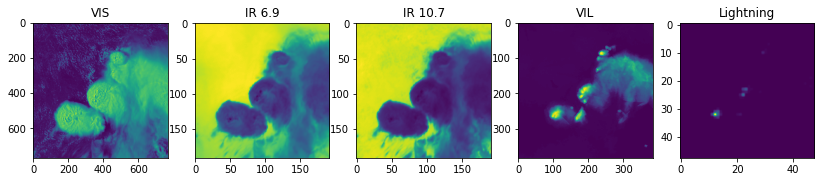

In [17]:
import numpy as np
def lght_to_grid(data):
    """
    Converts SEVIR lightning data stored in Nx5 matrix to an LxLx49 tensor representing
    flash counts per pixel per frame
    
    Parameters
    ----------
    data  np.array
       SEVIR lightning event (Nx5 matrix)
       
    Returns
    -------
    np.array 
       LxLx49 tensor containing pixel counts
    """
    FRAME_TIMES = np.arange(-120.0,125.0,5) * 60 # in seconds
    out_size = (48,48,len(FRAME_TIMES))
    if data.shape[0]==0:
        return np.zeros(out_size,dtype=np.float32)

    # filter out points outside the grid
    x,y=data[:,3],data[:,4]
    m=np.logical_and.reduce( [x>=0,x<out_size[0],y>=0,y<out_size[1]] )
    data=data[m,:]
    if data.shape[0]==0:
        return np.zeros(out_size,dtype=np.float32)

    # Filter/separate times
    # compute z coodinate based on bin locaiton times
    t=data[:,0]
    z=np.digitize(t,FRAME_TIMES)-1
    z[z==-1]=0 # special case:  frame 0 uses lght from frame 1

    x=data[:,3].astype(np.int64)
    y=data[:,4].astype(np.int64)

    k=np.ravel_multi_index(np.array([y,x,z]),out_size)
    n = np.bincount(k,minlength=np.prod(out_size))
    return np.reshape(n,out_size).astype(np.float32)

def read_lght_data( sample_event, data_path=DATA_PATH ):
    """
    Reads lght data from SEVIR and maps flash counts onto a grid  
    
    Parameters
    ----------
    sample_event   pd.DataFrame
        SEVIR catalog rows matching a single ID
    data_path  str
        Location of SEVIR data
    
    Returns
    -------
    np.array 
       LxLx49 tensor containing pixel counts for selected event
    
    """
    fn = sample_event[sample_event.img_type=='lght'].squeeze().file_name
    id = sample_event[sample_event.img_type=='lght'].squeeze().id
    with h5py.File(data_path + '/' + fn,'r') as hf:
        data      = hf[id][:] 
    return lght_to_grid(data)

lght = read_lght_data(sample_event)

# include lightning counts in plot
fig,axs = plt.subplots(1,5,figsize=(14,5))
frame_idx = 30
axs[0].imshow(vis[:,:,frame_idx]), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx]), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx]), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx]), axs[3].set_title('VIL')
axs[4].imshow(lght[:,:,frame_idx]), axs[4].set_title('Lightning')



The previous visualizations used the default colormap to display the data.  To display colorized images similar to those that are expected to be seen in SEVIR data, colormaps are available in the repo located here: https://github.com/MIT-AI-Accelerator/eie-sevir.  This code requires the module `sevir` found in this repo to be in our path.
We will clone the repo to access the libraries within.


In [18]:
! git clone https://github.com/MIT-AI-Accelerator/eie-sevir.git

Cloning into 'eie-sevir'...
remote: Enumerating objects: 257, done.
remote: Counting objects: 100% (212/212), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 257 (delta 120), reused 123 (delta 52), pack-reused 45
Receiving objects: 100% (257/257), 71.04 MiB | 12.04 MiB/s, done.
Resolving deltas: 100% (132/132), done.
Checking out files: 100% (30/30), done.


In [19]:
%cd eie-sevir/sevir
%pwd

/content/eie-sevir/sevir


'/content/eie-sevir/sevir'

We will now import the `get_cmap` function available in the display.py file.

In [20]:
from display import get_cmap

Visulizing the five sensor images using the SEVIR specific colormap, we have the resultant images as below:

(<matplotlib.image.AxesImage at 0x7f91911e7e50>, Text(0.5, 1.0, 'Lightning'))

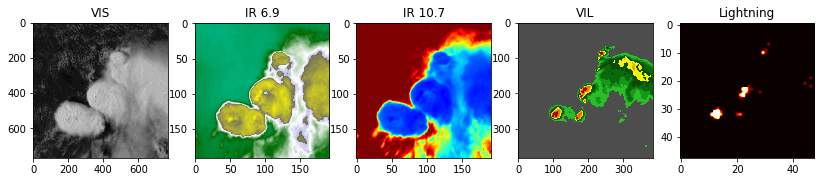

In [21]:
import sys
sys.path.append('../') # add sevir module to path
#import get_cmap
# Get colormaps for encoded types
vis_cmap,vis_norm,vis_vmin,vis_vmax = get_cmap('vis',encoded=True)
ir069_cmap,ir069_norm,ir069_vmin,ir069_vmax = get_cmap('ir069',encoded=True)
ir107_cmap,ir107_norm,ir107_vmin,ir107_vmax = get_cmap('ir107',encoded=True)
vil_cmap,vil_norm,vil_vmin,vil_vmax = get_cmap('vil',encoded=True)
lght_cmap,lght_norm,lght_vmin,lght_vmax = get_cmap('lght',encoded=True)

fig,axs = plt.subplots(1,5,figsize=(14,5))
frame_idx = 30
axs[0].imshow(vis[:,:,frame_idx],cmap=vis_cmap,norm=vis_norm,vmin=vis_vmin,vmax=vis_vmax), axs[0].set_title('VIS')
axs[1].imshow(ir069[:,:,frame_idx],cmap=ir069_cmap,norm=ir069_norm,vmin=ir069_vmin,vmax=ir069_vmax), axs[1].set_title('IR 6.9')
axs[2].imshow(ir107[:,:,frame_idx],cmap=ir107_cmap,norm=ir107_norm,vmin=ir107_vmin,vmax=ir107_vmax), axs[2].set_title('IR 10.7')
axs[3].imshow(vil[:,:,frame_idx],cmap=vil_cmap,norm=vil_norm,vmin=vil_vmin,vmax=vil_vmax), axs[3].set_title('VIL')
axs[4].imshow(lght[:,:,frame_idx],cmap=lght_cmap,norm=lght_norm,vmin=lght_vmin,vmax=lght_vmax), axs[4].set_title('Lightning')


## Georeferencing SEVIR Events

In many applications it's necessary to know the lat/lon positions of pixels in a SEVIR patch.  The catalog provides the required information to perform the georeferencing the data.

Currently, all patches in SEVIR use the same map projection, a Lambert Equal Area projection centered at (lat,lon)=(38,-98).  This specifics of the projection are stored in the `proj` column:


In [22]:
sample_event.proj.values[0]

'+proj=laea +lat_0=38 +lon_0=-98 +units=m +a=6370997.0 +ellps=sphere '

This string uses the [Proj4](https://proj.org/usage/index.html) syntax for defining a map projection.

The class below encodes the formulas for this particular projection.  Using this, it's possible to convert between pixel and lat/lon coordinates for each event in SEVIR.  

In [23]:
import re
import numpy as np
class LaeaProjection():
    """
    Translates between pixel coordinates (X,Y) and Lat lon coordinates for a given SEVIR event
    projected in laea.
    
    Parameters
    ----------
    event  pd.Series
        One row from SEVIR catalog
    """
    def __init__(self,event):
        self.proj = event.proj 
        self.lat0 = float(re.compile('\+lat_0=([+-]?\d+)').search(self.proj).groups()[0])
        self.lon0 = float(re.compile('\+lon_0=([+-]?\d+)').search(self.proj).groups()[0])
        self.R = float(re.compile('\+a=(\d+)').search(self.proj).groups()[0])
        self.llcrnlat = event.llcrnrlat
        self.llcrnlon = event.llcrnrlon
        self.refX, self.refY = self.forward(self.llcrnlon,self.llcrnlat,pixel=False)
        self.binX = event.width_m / event.size_x
        self.binY = event.height_m / event.size_y
        
    def forward(self,lon,lat,pixel=True):
        """
        Maps lat/lon to pixel x,y.  For projection coordinates instead of pixel, set pixel=False.
        """
        sind = lambda t: np.sin(t*np.pi/180)
        cosd = lambda t: np.cos(t*np.pi/180)
        k = self.R * np.sqrt(2/(1+sind(self.lat0)*sind(lat)+cosd(self.lat0)*cosd(lat)*cosd(lon-self.lon0)))
        x = k*cosd(lat)*sind(lon-self.lon0)
        y = k*(cosd(self.lat0)*sind(lat) - sind(self.lat0)*cosd(lat)*cosd(lon-self.lon0))
        if pixel:
            x = (x-self.refX) / self.binX
            y = (y-self.refY) / self.binY
        return x,y
    def inverse(self,x,y,pixel=True):
        """
        Maps pixel coordinates to (lon,lat) position.  If passing projection corrdinates, set pixel=False.
        """
        if pixel:
            x = x*self.binX + self.refX
            y = y*self.binY + self.refY
        x/=self.R
        y/=self.R
        sind = lambda t: np.sin(t*np.pi/180)
        cosd = lambda t: np.cos(t*np.pi/180)
        rho = np.sqrt(x*x+y*y)
        c = 2*np.arcsin(0.5*rho)
        sinc = np.sin(c)
        cosc = np.cos(c)
        lat = 180/np.pi*np.arcsin(cosc*sind(self.lat0)+y*sinc*cosd(self.lat0)/rho)
        lon = self.lon0+180/np.pi*np.arctan(x*sinc/(rho*cosd(self.lat0)*cosc - y*sind(self.lat0)*sinc))
        return lon,lat
        

## Georeferencing an event

Using this class, we can get a grid of latitudes and longitudes for our `event_id`=835047.  

Text(0.5, 1.0, 'Pixel Longitudes')

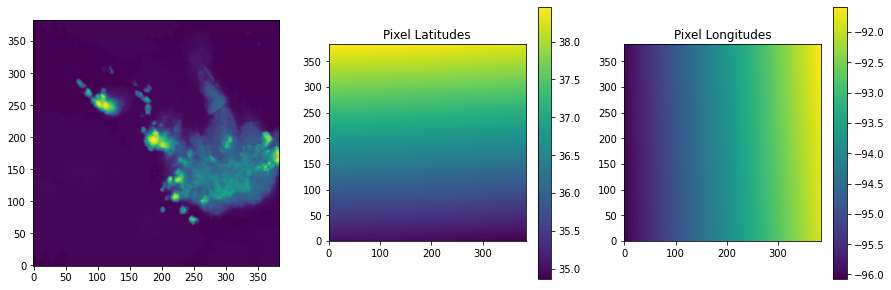

In [25]:
proj = LaeaProjection(sample_event[sample_event.img_type=='vil'].squeeze() )
X,Y = np.meshgrid(np.arange(vil.shape[0]),np.arange(vil.shape[0]))
lons,lats = proj.inverse(X,Y)

# Plot with origin='lower' so up corresponds to north.
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(vil[:,:,20],origin='lower')
la = ax[1].imshow(lats,origin='lower') 
fig.colorbar(la,ax=ax[1]) 
ax[1].set_title('Pixel Latitudes')
lo = ax[2].imshow(lons,origin='lower') 
fig.colorbar(lo,ax=ax[2]) 
ax[2].set_title('Pixel Longitudes')

This particular domain overlaps with Southwestern Missouri.  We can add markers for particular locations by converting from lat/lon coordinates into the image pixel coordinates:

x=192.107485,y=192.449596


Text(162.10748498892426, 162.4495960216667, 'Cassville, MI')

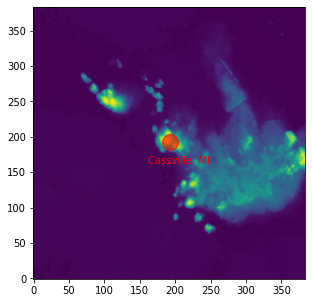

In [26]:
lat,lon = 36.69, -93.87 # Cassville, MI
x,y=proj.forward(lon,lat)
print('x=%f,y=%f' % (x,y))
# Plot with origin='lower' so up corresponds to north.
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.imshow(vil[:,:,20],origin='lower')
ax.plot(x,y,linestyle='none', marker="o", markersize=16, alpha=0.6, c="red")
ax.text(x-30,y-30,'Cassville, MI',color='r')

We can additionally enhance the above image by visualizing it with more features like statelines. There are a number of python modules that compute these conversions for us, and allow us to visualize the georeferenced result with features like coast lines, state borders and other nice map features.  `pyproj` is a popular module for computing geospatial transformations.  `Basemap` and `Cartopy` are nice plotting libraries.  The cell below shows how perform the georeferencing done previously, but instead using the `Basemap` library to add state borders.

In [27]:
pip install basemap basemap-data-hires

     |████████████████████████████████| 862 kB 5.2 MB/s 
     |████████████████████████████████| 91.1 MB 53 kB/s 
     |████████████████████████████████| 6.3 MB 27.1 MB/s 
     |████████████████████████████████| 15.7 MB 33.2 MB/s 
     |████████████████████████████████| 30.5 MB 66.1 MB/s 
     |████████████████████████████████| 219 kB 56.6 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=26c4bb7eb5cb75b4c06f8ee70482720d5c1186b734d15ac585a56fb645c9a9cb
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.

Text(162107.48498892388, 162449.59602166762, 'Cassville, MI')

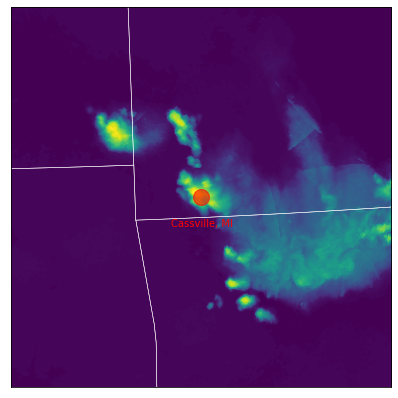

In [28]:
# Note:  Requires basemap module to run
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.basemap import Basemap # conda/pip install basemap basemap-data-hires
# Create Basemap Object
s=sample_event[sample_event.img_type=='vil'].squeeze() 
fig,ax=plt.subplots(1,1,figsize=(7,7))
m = Basemap(llcrnrlat=s.llcrnrlat, llcrnrlon=s.llcrnrlon,
            urcrnrlat=s.urcrnrlat,urcrnrlon=s.urcrnrlon,
            width=s.width_m, height=s.height_m,
            lat_0=38, lon_0=-98,
            projection='laea',
            resolution='i',
            ax=ax)
m.drawstates(color='w')
m.drawcoastlines(color='w')
m.drawcountries(color='w')
m.imshow(vil[:,:,24])

lat,lon = 36.69, -93.87 # Cassville, MI
x,y=m(lon,lat) # will be in projection coordinates
m.plot(x,y,linestyle='none', marker="o", markersize=16, alpha=0.6, c="red")
ax.text(x-30e3,y-30e3,'Cassville, MI',color='r')


## Conclusion

This notebook ran us through a thorough exploration of the SEVIR Dataset all the way from accessing SEVIR data from the AWS S3 buckets using boto3 to visualizing each type of sensor data `vis`, `vil`, `ir069`, `ir107` and  `lght`. We also georeferenced the SEVIR Data using the `CATALOG.csv` files and plotted the actual coordinates of the event as Cassville, MI. We used basemap projections for a more intuitive visualization using state borders.

#References

* NOAA's Storm Event Database:  https://www.ncdc.noaa.gov/stormevents/ftp.jsp
* https://nbviewer.org/github/MIT-AI-Accelerator/eie-sevir/blob/master/examples/SEVIR_Tutorial.ipynb
* https://github.com/MIT-AI-Accelerator/sevir_challenges
* https://raw.githubusercontent.com/MIT-AI-Accelerator/eie-sevir/master/CATALOG.csv
* https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/
* https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/Storm-Data-Bulk-csv-Format.pdf
* https://sevir.mit.edu/sites/default/files/About_SEVIR.pdf
* https://proceedings.neurips.cc/paper/2020/file/fa78a16157fed00d7a80515818432169-Paper.pdf
